# Quick start fro v.1.1.0

This is a quick start tutorial, please read the full [userguide](https://jetset.readthedocs.io/en/1.1.0/user_guide/user_guide.html)

# Basic features and SSC

for more info  [ssc section of the userguide](https://jetset.readthedocs.io/en/1.1.0/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html)

## Basic setup

In [1]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


In [3]:
my_jet.show_pars()


      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

In [4]:
my_jet.parameters.par_table


name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,object,bool,bool
N,electron_density,1 / cm3,100.0,0.0,None,False,False
gmin,low-energy-cut-off,lorentz-factor*,2.0,1.0,1000000000.0,False,False
gmax,high-energy-cut-off,lorentz-factor*,1000000.0,1.0,1000000000000000.0,False,False
s,LE_spectral_slope,,2.0,-10.0,10.0,False,False
r,spectral_curvature,,0.4,-15.0,15.0,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,10000.0,1.0,1000000000.0,False,False
R,region_size,cm,5000000000000000.0,1000.0,1e+30,False,False
R_H,region_position,cm,1e+17,0.0,None,False,True
B,magnetic_field,G,0.1,0.0,None,False,False


In [5]:
my_jet.show_model()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- -

## Setting the parameters

assume you want to change some of the parameters in your model, you can use two methods:

using the `set_par()` method

In [6]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

or you can access directly the paramter 

In [7]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## Investigating the electron distribution


In [8]:
my_jet.show_electron_distribution()


-------------------------------------------------------------------------------------------------------------------
electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               B      magnetic_field               G                0.2              0.0               None False  False
               N    electron_density         1 / cm3             1000.0              0.0               None False  False
               R         region_size              cm 1000000000000000.0           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False  

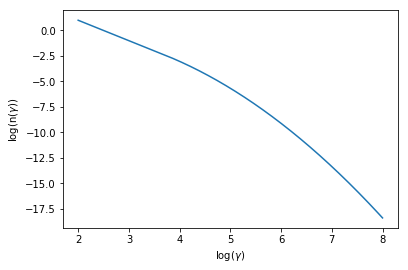

In [9]:
p=my_jet.electron_distribution.plot()


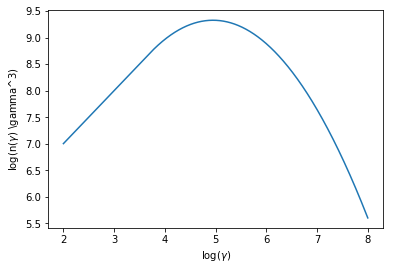

In [10]:
p=my_jet.electron_distribution.plot3p()


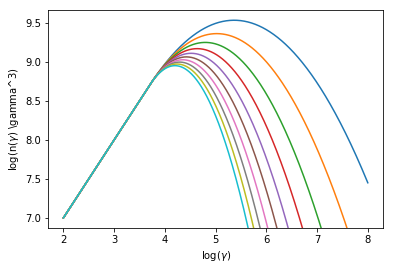

In [11]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    if p is None:
        p=my_jet.electron_distribution.plot3p()
    else:
        p=my_jet.electron_distribution.plot3p(p)

## Using log values for electron distribution parameters


In [12]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ----

## Evaluate and plot the model

In [13]:
my_jet.eval()


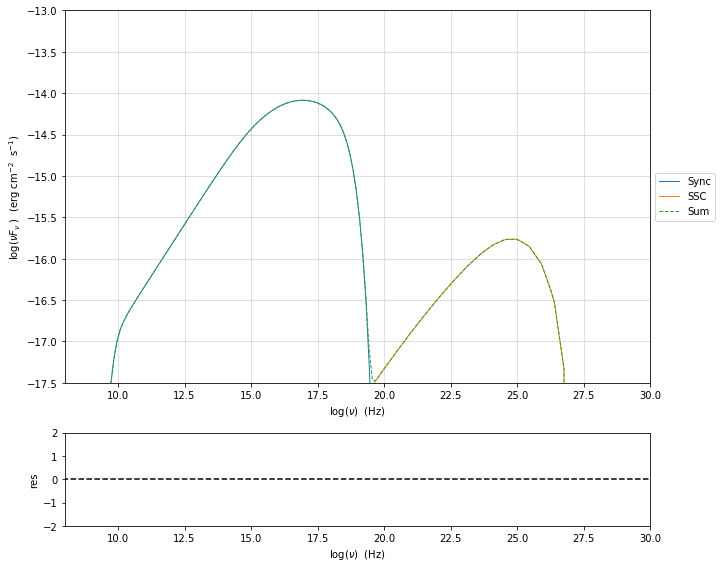

In [14]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

you can change the size of the grid for the IC frequencies (this will increase the computation time)

In [15]:
my_jet.set_IC_nu_size(100)


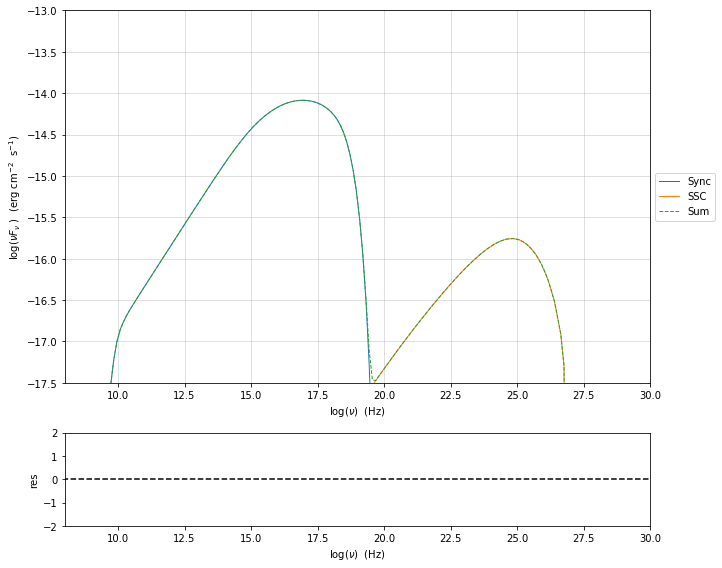

In [16]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Plotting in the src frame (istropic luminosities)

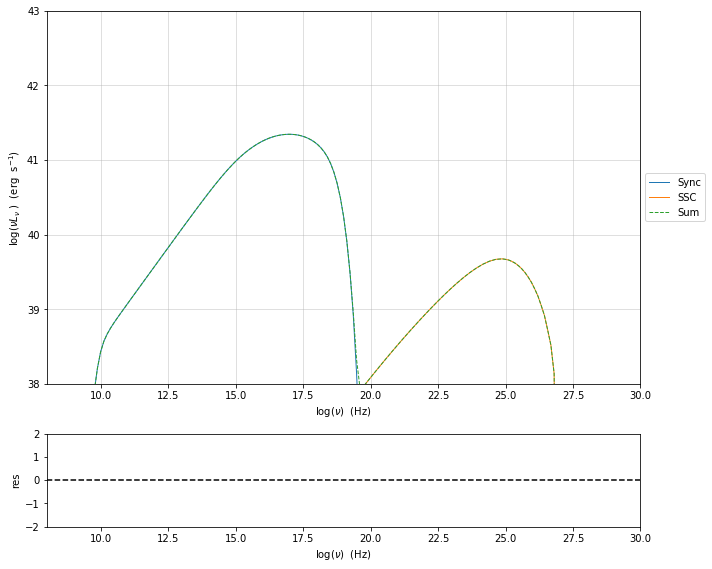

In [17]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

## Comparing how the model reacts as we change the parameters

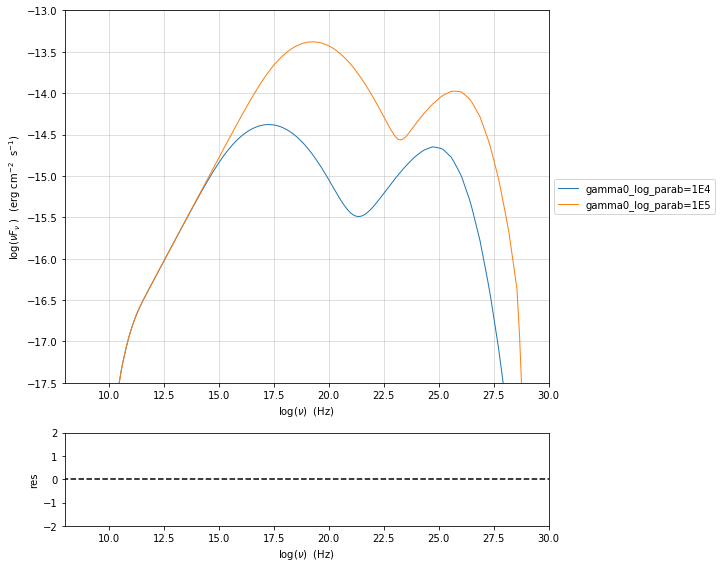

In [18]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Saving images

In [19]:
my_plot.save('jet1.png')


## Saving and loading models

In [20]:
my_jet.save_model('test_model.dat')


In [21]:
my_jet=Jet.load_model('test_model.dat')

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               R         region_size              cm 316227766016837.94           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False   True
               B      magnetic_field               G                0.2              0.0               None False  False
        beam_obj             beaming Lorentz-factor*               10.0           0.0001               None False  False
          z_cosm            redshift                                0.1              0.0               None False  False
               N    electron_density         1 / cm3             1000.0              0.0               None False  False
            gmin  low-energy-cut

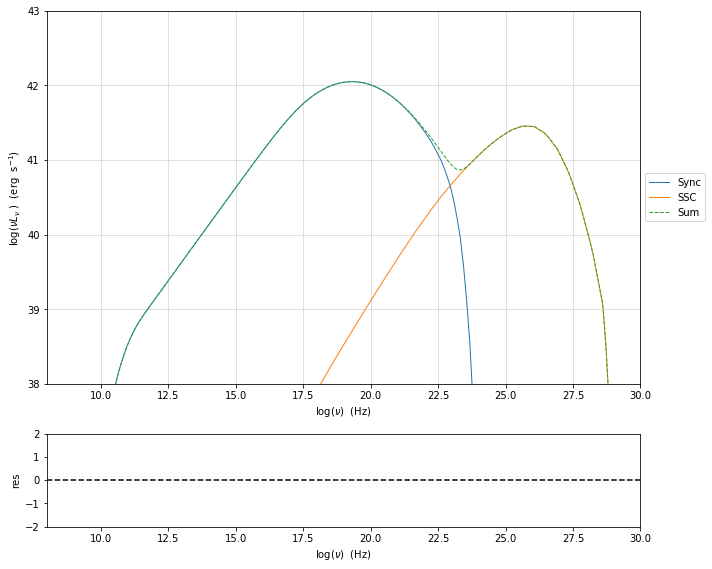

In [22]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

## Switching on/off the particle distribution normalization


\begin{aligned}
\int
\end{aligned}

As default the electron distributions are normalized, i.e. are multiplied by a constant ``N_0``, in such a way that :

\begin{aligned}
\int_{\gamma_{min}}^{\gamma_{max}} n(\gamma) d\gamma =1
\end{aligned}
it means the the value `N`, refers to the actual density of emitters.
If you want to chance this behavior, you can start looking at the sate of `Norm_distr` flag with the following command

In [23]:
my_jet.Norm_distr

1

and then you can switch off the normalization withe command

In [24]:
my_jet.switch_Norm_distr_OFF()

OR

In [25]:
my_jet.Norm_distr=0

or set back the normalization on with

In [26]:
my_jet.switch_Norm_distr_ON()

OR

In [27]:
my_jet.Norm_distr=1

## Setting the number density of emitters fron observed fluxes or luminosities

It is possible to set the vlue of `N` in order that the observed synchrotron flux at a given frequency matches a desired value. 
For example, assume that we wish to set `N` in order that  the synchrotron flux at $10^{15}$ Hz is exactly matching the desired value of $10^{-14}$ ergs cm-2 s-1. We can accomplish this by using the method `Jet.get_par_by_name()` as follows: 

In [28]:
my_jet=Jet(name='test',electron_distribution='lppl')
my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

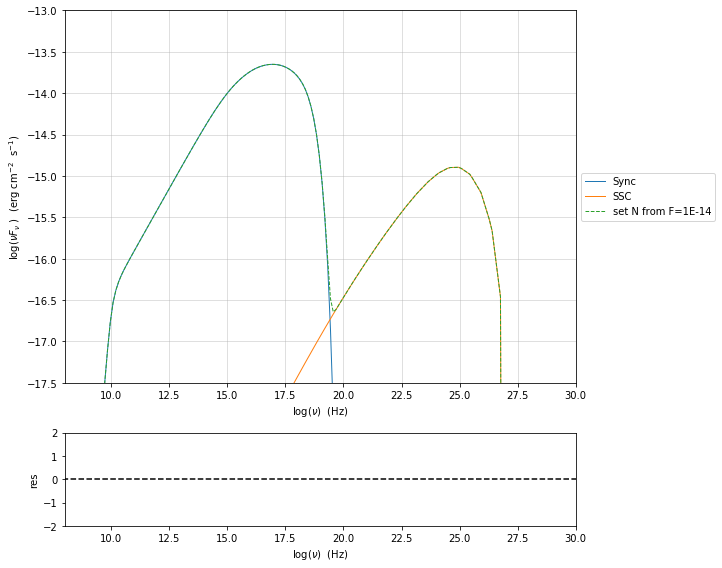

In [29]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

Alternatively, the value of N  can be obtained using the rest-frame luminosity and  frequency, using the method `Jet.set_N_from_nuLnu()`

In [30]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

where `L_0` is the source rest-frame istropic luminosity in erg/s at the rest-frame frequency ``nu_0`` in Hz.


## setting the beaming factor and expression

It is possible to set the beaming factor according to the relativistic BulkFactor and viewing angle, this can be done by setting the ``beaming_expr`` kw in the Jet constructor, possible choices are

* `delta` to provide directly the beaming factor (default)
* `bulk_theta` to provide the BulkFactor and the jet  viewing angle 

In [31]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.parameters.show_pars()
my_jet.get_beaming()


      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

19.943844732554165

In [32]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')
my_jet.parameters.beam_obj.val=10

In [33]:
my_jet.parameters.show_pars()
my_jet.get_beaming()

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

10.0

## Accessing individual spectral components

In [34]:
my_jet.eval()
my_jet.list_spectral_components()


Sum
Sync
SSC


In [35]:
my_jet.spectral_components.Sync.SED.nuFnu

<Quantity [1.00000000e-120, 1.00000000e-120, 1.00000000e-120,
           1.00000000e-120, 1.00000000e-120, 1.00000000e-120,
           1.00000000e-120, 1.00000000e-120, 1.16350576e-027,
           2.74670232e-027, 6.54257521e-027, 1.57613697e-026,
           3.85008311e-026, 9.55743754e-026, 2.41360585e-025,
           6.19512817e-025, 1.61085832e-024, 4.22187047e-024,
           1.10966482e-023, 2.91830325e-023, 7.67580406e-023,
           2.01894055e-022, 5.31035279e-022, 1.39676429e-021,
           3.67385963e-021, 9.66319770e-021, 2.54163223e-020,
           6.68444858e-020, 1.75710260e-019, 4.60558785e-019,
           1.18829368e-018, 2.87188945e-018, 5.97628711e-018,
           9.96296450e-018, 1.37778091e-017, 1.71459498e-017,
           2.04614970e-017, 2.39162409e-017, 2.76808202e-017,
           3.18942900e-017, 3.66753955e-017, 4.21359466e-017,
           4.83909050e-017, 5.55659363e-017, 6.37965885e-017,
           7.32448619e-017, 8.40905012e-017, 9.65395587e-017,
        

In [36]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [37]:
t_obs

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
1318256.7385564074,1e-120,1e-120,1e-120
1737800.8287493763,1e-120,1e-120,1e-120
2290867.6527677746,1e-120,1e-120,1e-120
3019951.720402019,1e-120,1e-120,1e-120
3981071.7055349695,1e-120,1e-120,1e-120
5248074.602497723,1e-120,1e-120,1e-120
6918309.709189363,1e-120,1e-120,1e-120


for more details (how to get spectral components for  `src` and `obs` frame, or how to use astropy units for units conversion see for [userguide section of spectral components](https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html#accessing-individual-spectral-components)

## Energetic report


In [38]:
my_jet.energetic_report(verbose=False)
my_jet.energetic_report_table


name,type,units,val
str13,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,0.0017404342430246782
U_p,Energy dens. blob rest. frame,erg / cm3,0.015032764261
U_B,Energy dens. blob rest. frame,erg / cm3,0.00039788735772973844
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.506769532122052e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,0.5506769532122052
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.0
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.0
U_DT,Energy dens. blob rest. frame,erg / cm3,0.0
U_CMB,Energy dens. blob rest. frame,erg / cm3,0.0


# External Compton 


The external Compton implementation  gives you the possibility to use a double approach
 
* transformation of the external  fields to the blob rest frame :cite:`Dermer2000`

* transformation of the electron emitting distribution from the blob restframe to
  disk/BH restframe :cite:`Dermer95` :cite:`GKM01`

Regading the single external radiavite fiels 
 
* Implementation of Broad Line Region radiative field using the approach of :cite:`Donea2003` 

* Dusty torus implemented as a uniform BB field within `R_DT`

* accretion disk can be set a single BB or a multitemperature BB

* CMB 

Please read  the usere guide for more informations see the [EC userguide section](https://jetset.readthedocs.io/en/1.1.0/user_guide/jet_model_phys_EC/Jet_example_phys_EC.html)

![EC model](images/jetset_EC_scheme.png)

In [39]:
from jetset.jet_model import Jet
my_jet=Jet(name='BLR example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'])
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

    name          par type           units             val         phys. bound. min  phys. b

In [40]:
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('gmax',val=5E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=3E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.2)
my_jet.set_par('R',val=3E15)
my_jet.set_par('B',val=1.5)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
my_jet.set_IC_nu_size(100)

we can change the disk type from single temperature BB to multi temperature BB

In [41]:
my_jet.set_par('disk_type',val='MultiBB')


we can add alos the dusty torus emissio

In [42]:
my_jet.add_EC_component('DT')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLR example  

electron distribution:
 type: bkn  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
   name:DT, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

    name          par type           units             val         ph

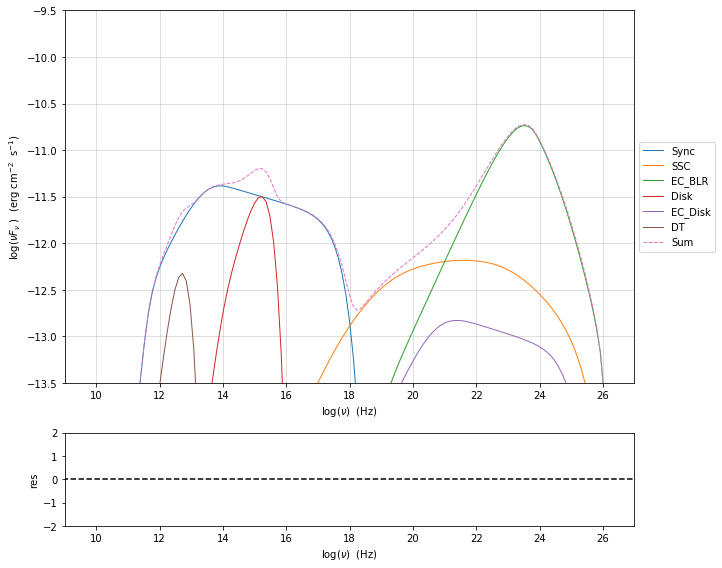

In [43]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

## Changing the external field transformation, the case of IC against the CMB

In [44]:
my_jet.set_external_field_transf('blob')

my_jet.set_external_field_transf('disk')


In [45]:
my_jet=Jet(name='test_equipartition',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.set_par('R',val=1E21)
my_jet.set_par('z_cosm',val= 0.651)
my_jet.set_par('B',val=2E-5)
my_jet.set_par('gmin',val=50)
my_jet.set_par('gamma0_log_parab',val=35.0E3)
my_jet.set_par('gmax',val=30E5)
my_jet.set_par('theta',val=12.0)
my_jet.set_par('BulkFactor',val=3.5)
my_jet.set_par('s',val=2.58)
my_jet.set_par('r',val=0.42)
my_jet.set_N_from_nuFnu(5E-15,1E12)
my_jet.add_EC_component('EC_CMB')

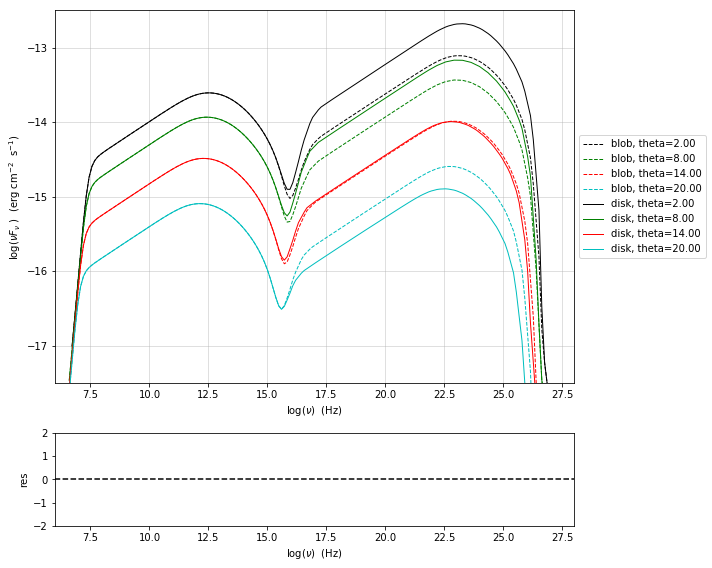

In [46]:
from jetset.plot_sedfit import PlotSED
p=PlotSED()

my_jet.set_external_field_transf('blob')
c= ['k', 'g', 'r', 'c']
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='blob, theta=%2.2f'%theta,line_style='--',color=c[ID])

my_jet.set_external_field_transf('disk')
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='disk, theta=%2.2f'%theta,line_style='',color=c[ID])

p.rescale(y_min=-17.5,y_max=-12.5,x_max=28)

We can now compare the different beaming pattern for the EC emission if the CMB, and realize that the beaming pattern is different. 
This is very important in the case of radio galaxies. The `src` transformation is the one to use in the case of radio galaies or 
misaligned AGNs, and  gives a more accurate results.
Anyhow, be careful that  this  works only for isotropic external fields, suchs as the CMB,  or BLR 
seed photons whitin the Dusty torus radius, and BLR radius, respectively


## Equipartition

It is also possible to set our jet at the equipartition, that is achieved not using analytical approximation, but by numerically finding the equipartition value over a grid.
We have to provide the value of the observed flux (`nuFnu_obs`) at a given observed frequency (`nu_obs`), the minimum value of B (`B_min`), and the number of grid points (`N_pts`)


B grid min  1e-09
B grid max  1.0
grid points 50


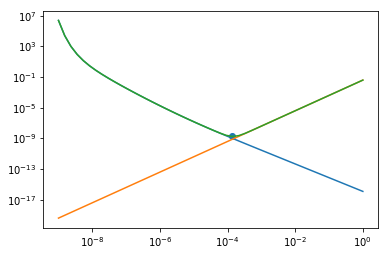

setting B to  0.0001389495494373139
setting N to  9.13927847193837e-06
      name             par type           units               val          phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- --------------------- ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3  9.13927847193837e-06              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                  50.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*             3000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                  2.58            -10.0               10.0 False  False
               r  spectral_curvature                                  0.42            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*         

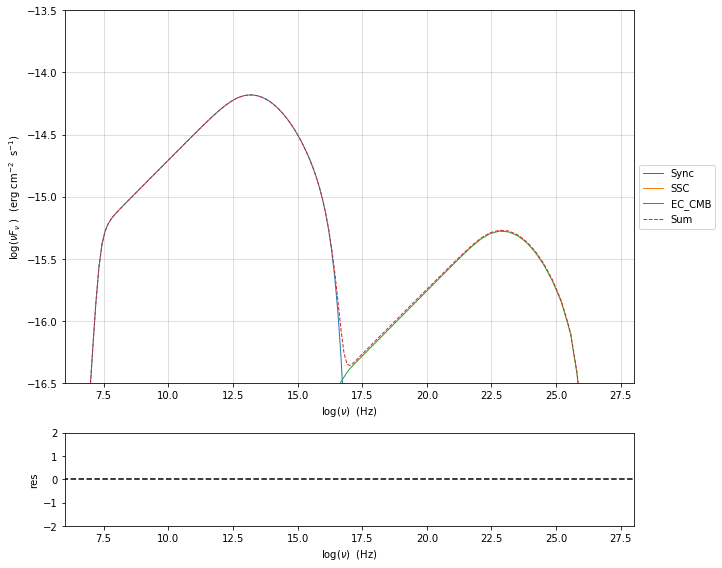

In [47]:
my_jet.parameters.theta.val=12
B_min,b_grid,U_B,U_e=my_jet.set_B_eq(nuFnu_obs=5E-15,nu_obs=1E12,B_min=1E-9,N_pts=50,plot=True)
my_jet.show_pars()

my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-16.5,y_max=-13.5,x_max=28)

# Lodaing SED

For more details see the [usergide data format section](https://jetset.readthedocs.io/en/1.1.0/user_guide/load_data/Jet_example_load_data.html)
The data are treated using two classes from the module `data_loader` module

`jetset.data_loader.Data` class 

`jetset.data_loader.ObsData` class 

The class  `jetset.data_loader.Data` is in charge of storing the data, giving access to the I/O functionalities, and provides an interface  to the astropy`Table` class (see the  [astropy table](https://docs.astropy.org/en/stable/table/>) documentation, for further information)

The class  `jetset.data_loader.ObsData` uses the information stored in :class:`jetset.data_loader.Data`, and can perform several operations 
 
 - rebinning (grouping) of the data
 - selection of time ranges
 - selection of datasets
 - transformation from linear to logarithmic representation
 - handling of errors and systematics


In [48]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs

In [49]:
data=Data.from_file(test_SEDs[2])
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
2299540000.0,0.0,3.6892e-14,2.668e-15,0.0,0.0,False,0.0
2639697000.0,0.0,4.12456e-14,9.712535e-26,0.0,0.0,False,0.0
4799040000.0,0.0,7.0368e-14,4.8e-16,0.0,0.0,False,0.0
4805039000.0,0.0,5.435586e-14,5.435586e-15,0.0,0.0,False,0.0
4805039000.0,0.0,3.239547e-14,3.239547e-15,0.0,0.0,False,0.0
4843552000.0,0.0,7.174767e-14,7.333333e-26,0.0,0.0,False,0.0
4999750000.0,0.0,8e-14,3.344772e-15,0.0,0.0,False,0.0
7698460000.0,0.0,1.15577e-13,6.16e-16,0.0,0.0,False,0.0



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



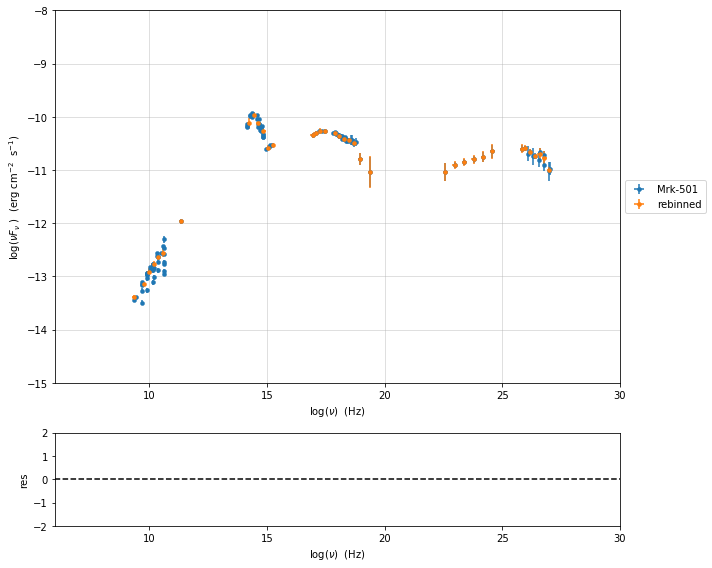

In [50]:
%matplotlib inline
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()
myPlot.rescale(y_min=-15)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')

# Phenomenological model constraining


For more details see the usergide  corresponding [section](https://jetset.readthedocs.io/en/1.1.0/user_guide/phen_constr/Jet_example_phenom_constr.html)


## evaluation of spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.295207e+00, err=1.359752e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.455018e+00, err=5.280897e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.296277e+00, err=3.749588e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.300000,14.700000]
---> name = IR_Opt           range=[12.300,14.700] log(Hz)  photon.val=-2.087455e+00, err=5.433975e-01 

---> initial range for i

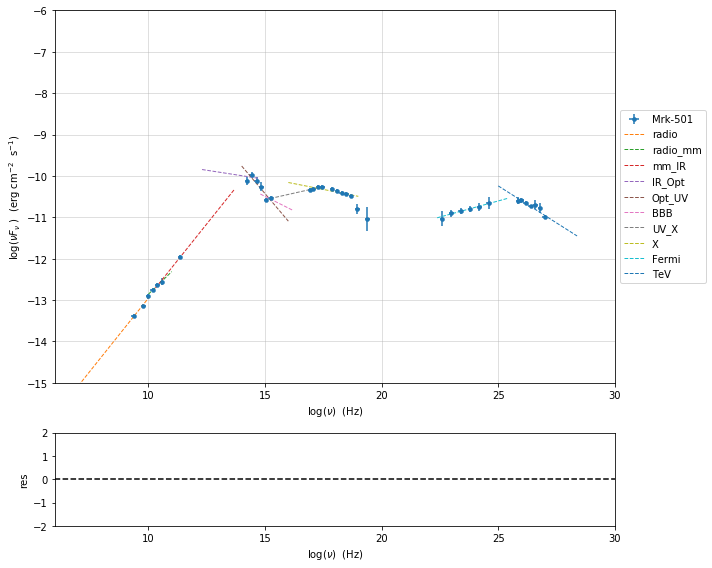

In [51]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

## log-log SED shapying

In [52]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP
    name       par type       units              val           phys. bound. min phys. bound. max  log  frozen
------------ ------------ ------------- ---------------------- ---------------- ---------------- ----- ------
           b    curvature                 -0.06411142567190709            -10.0              0.0 False  False
           c third-degree               -0.0017517043999486503            -10.0             10.0 False  False
          Ep    peak freq            Hz     17.037469323035243              0.0             30.0  True  False
          Sp    peak flux erg / (cm2 s)    -10.300678073393044            -30.0              0.0  True  False
nuFnu_p_host  nuFnu-scale erg / (cm2 s)    -10.065562043463723            -20.0             20.0 False  False
    nu_scale     nu-scale            Hz    0.01730750205131648             -2.0        


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.1310958292206994            -10.0              0.0 False  False
   c third-degree               -0.03300307548904158            -10.0             10.0 False  False
  Ep    peak freq            Hz   25.496044142870343              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)  -10.579458692670435            -30.0              0.0  True  False

converged=True
calls=217
------------------------------------------------------------------
| FCN = 1.997                   |     Ncalls=216 (216 total)     |
| EDM = 9.56E

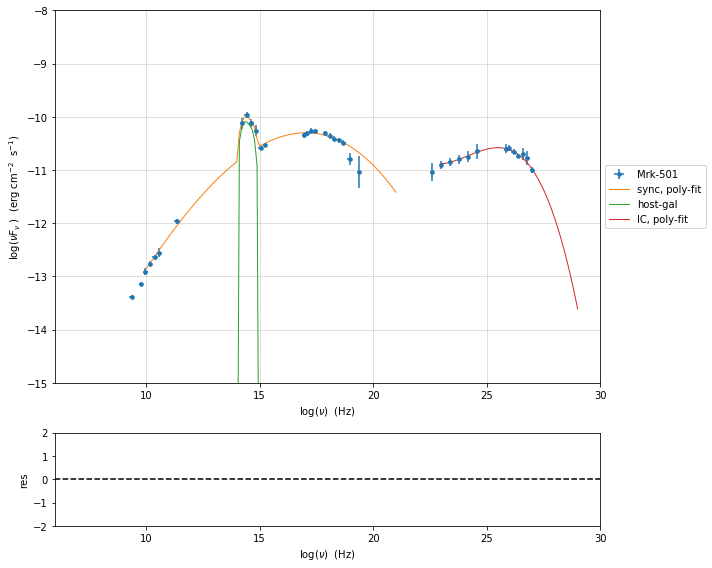

In [53]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

## model preconstrainin from sed shaping

In [54]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet_gal_templ.dat')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.879504e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

## numerical fitting with least square bound minimizer

In [55]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet_gal_templ.dat')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=my_shape.host_gal)
fit_model_lsb.freeze('z_cosm')
fit_model_lsb.freeze('R_H')
fit_model_lsb.parameters.beam_obj.fit_range=[5,50]
fit_model_lsb.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.parameters.gmax.fit_range=[1E4,1E8]
fit_model_lsb.parameters.nuFnu_p_host.frozen=False
fit_model_lsb.parameters.nu_scale.frozen=True


model_minimizer_lsb,best_fit_lsb=fit_SED(fit_model_lsb,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-lsb',minimizer='lsb')

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               R         region_size              cm 5485641265784695.0           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False   True
               B      magnetic_field               G                0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*               25.0           0.0001               None False  False
          z_cosm            redshift                             0.0336              0.0               None False  False
               N    electron_density         1 / cm3 107.84943545012176              0.0               None False  False
            gmin  low-energy-cut

In [56]:
best_fit_lsb.save_report()
best_fit_lsb.bestfit_table

name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str16,object,object,object,float64,float64,object,bool
R,8378228093120288.0,2.204486627707412e+16,None,5485641265784695.0,3162277660168379.5,3.1622776601683795e+17,False
R_H,None,None,None,1e+17,0.0,None,True
B,0.017801553453728358,0.01679317589598411,None,0.1,0.0,None,False
beam_obj,46.95494511788813,46.391377140656175,None,25.0,5.0,50,False
z_cosm,None,None,None,0.0336,0.0,None,True
N,47.97366358048528,142.13768244872657,None,107.84943545012176,0.0,None,False
gmin,102.46624530427954,0.2531078937618845,None,105.70739829384722,1.0,1000000000.0,False
gmax,7929178.419082588,9702557.590413574,None,1642066.7004262165,10000.0,100000000.0,False
s,2.2455458450296977,0.04802909037375515,None,2.2487867617516875,-10.0,10.0,False


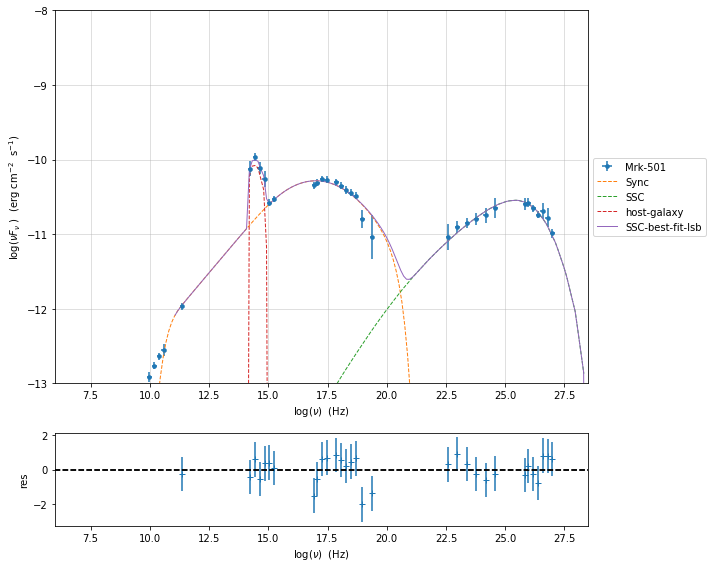

In [57]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

## Numerical fitting with minuit minimizer


In [58]:
jet_minuit=Jet.load_model('prefit_jet_gal_templ.dat')
jet_minuit.set_gamma_grid_size(200)

fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-best-fit-minuit',template=my_shape.host_gal)
fit_model_minuit.freeze('z_cosm')
fit_model_minuit.freeze('R_H')
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]
fit_model_minuit.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.nuFnu_p_host.frozen=False
fit_model_minuit.parameters.nu_scale.frozen=True

model_minimizer_minuit,best_fit_minuit=fit_SED(fit_model_minuit,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit')

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               R         region_size              cm 5485641265784695.0           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False   True
               B      magnetic_field               G                0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*               25.0           0.0001               None False  False
          z_cosm            redshift                             0.0336              0.0               None False  False
               N    electron_density         1 / cm3 107.84943545012176              0.0               None False  False
            gmin  low-energy-cut

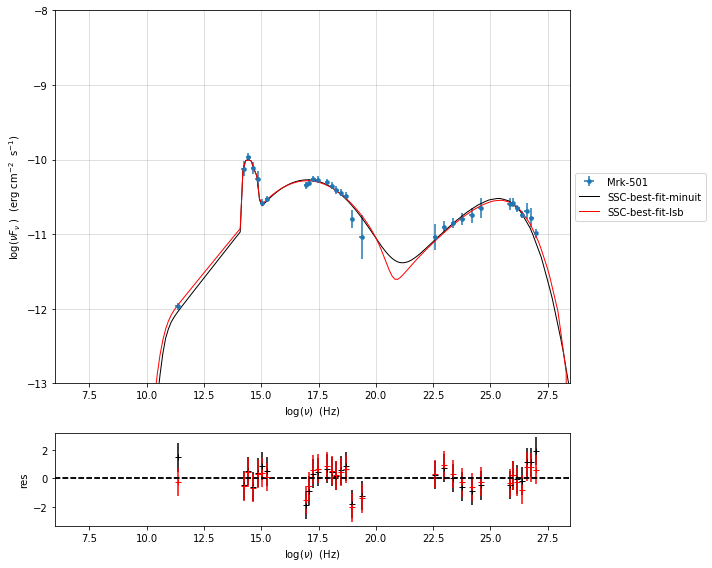

In [59]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

## Comparins of differnt moldes

We define now a model with a bkn power law as electron distribution, and we compare it with the lppl models  above

In [60]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='bkn',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet_bkn_gal_templ.dat')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.879504e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

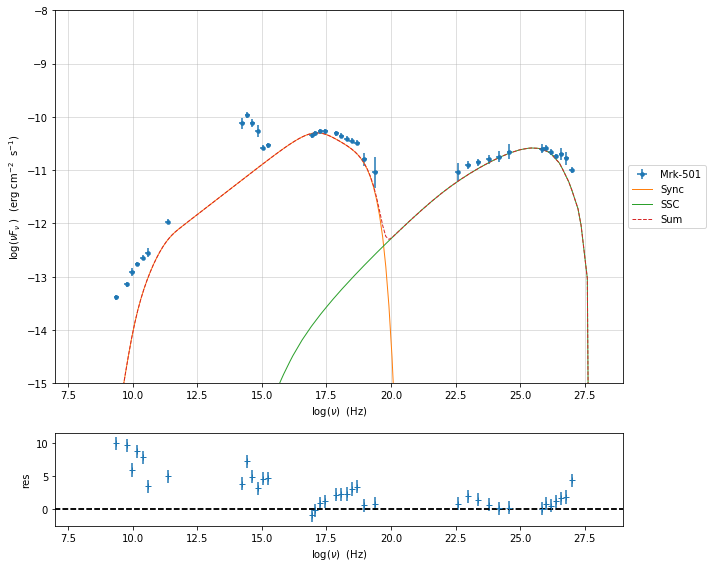

In [61]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

In [62]:
jet_minuit_bkn=Jet.load_model('prefit_jet_bkn_gal_templ.dat')
jet_minuit_bkn.set_gamma_grid_size(200)

fit_model_minuit_bkn=FitModel( jet=jet_minuit_bkn, name='SSC-best-fit-bkn-minuit',template=my_shape.host_gal) 
fit_model_minuit_bkn.freeze('z_cosm')
fit_model_minuit_bkn.freeze('R_H')
fit_model_minuit_bkn.parameters.beam_obj.fit_range=[5,50]
fit_model_minuit_bkn.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit_bkn.parameters.nuFnu_p_host.frozen=False
fit_model_minuit_bkn.parameters.nu_scale.frozen=True

model_minimizer_minuit_bkn,best_fit_minuit_bkn=fit_SED(fit_model_minuit_bkn,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit')

    name          par type           units               val          phys. bound. min  phys. bound. max   log  frozen
----------- ------------------- --------------- --------------------- ---------------- ------------------ ----- ------
          R         region_size              cm 1.045239707969101e+16           1000.0              1e+30 False  False
        R_H     region_position              cm                 1e+17              0.0               None False   True
          B      magnetic_field               G  0.031327047381077736              0.0               None False  False
   beam_obj             beaming Lorentz-factor*                  25.0           0.0001               None False  False
     z_cosm            redshift                                0.0336              0.0               None False  False
          N    electron_density         1 / cm3    21.934513544042005              0.0               None False  False
       gmin  low-energy-cut-off lorentz-factor* 

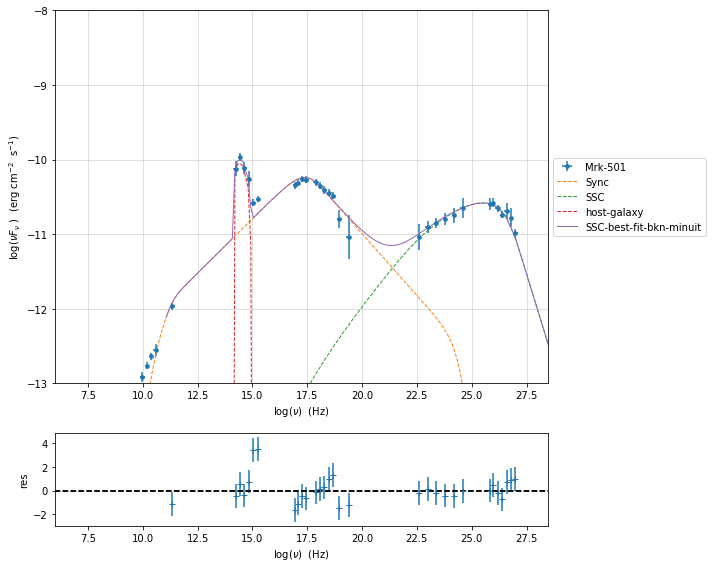

In [63]:
%matplotlib inline
fit_model_minuit_bkn.set_nu_grid(1E6,1E30,200)
fit_model_minuit_bkn.eval()
p2=fit_model_minuit_bkn.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

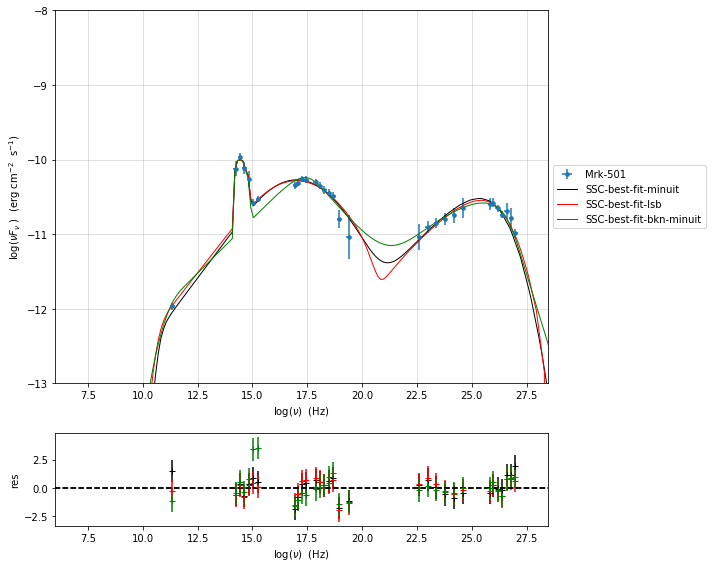

In [64]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit_bkn.set_nu_grid(1E6,1E30,200)
fit_model_minuit_bkn.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.add_model_plot(fit_model_minuit_bkn,color='green')
p2.add_residual_plot(fit_model_minuit_bkn,sed_data,fit_range=[ 11,29],color='green')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

# Runing a MCMC 

In [65]:
from jetset.mcmc import McmcSampler


In [66]:
jet_lsb.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer_lsb)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

| progress=102.000% calls=7650 accepted=5895

In [67]:
mcmc.seve_run('test_run')


In [68]:
from jetset.mcmc import SamplerOutput
s=SamplerOutput.from_file('test_run')


In [69]:
mcmc.sampler_out.get_par('N')


(array([42.41723463, 42.41723463, 42.41723463, ..., 75.81441844,
        75.81441844, 75.81441844]), 3)

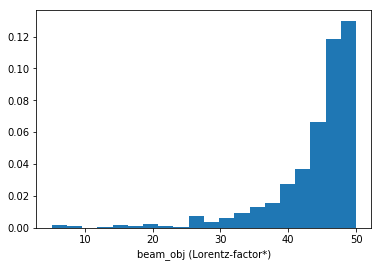

In [70]:
f=s.plot_par('beam_obj',log_plot=False)


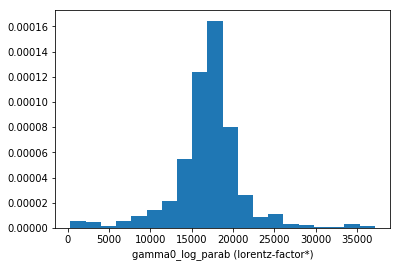

In [71]:
f=s.plot_par('gamma0_log_parab',log_plot=False)


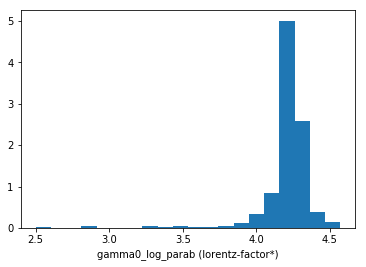

In [72]:
f=s.plot_par('gamma0_log_parab',log_plot=True)


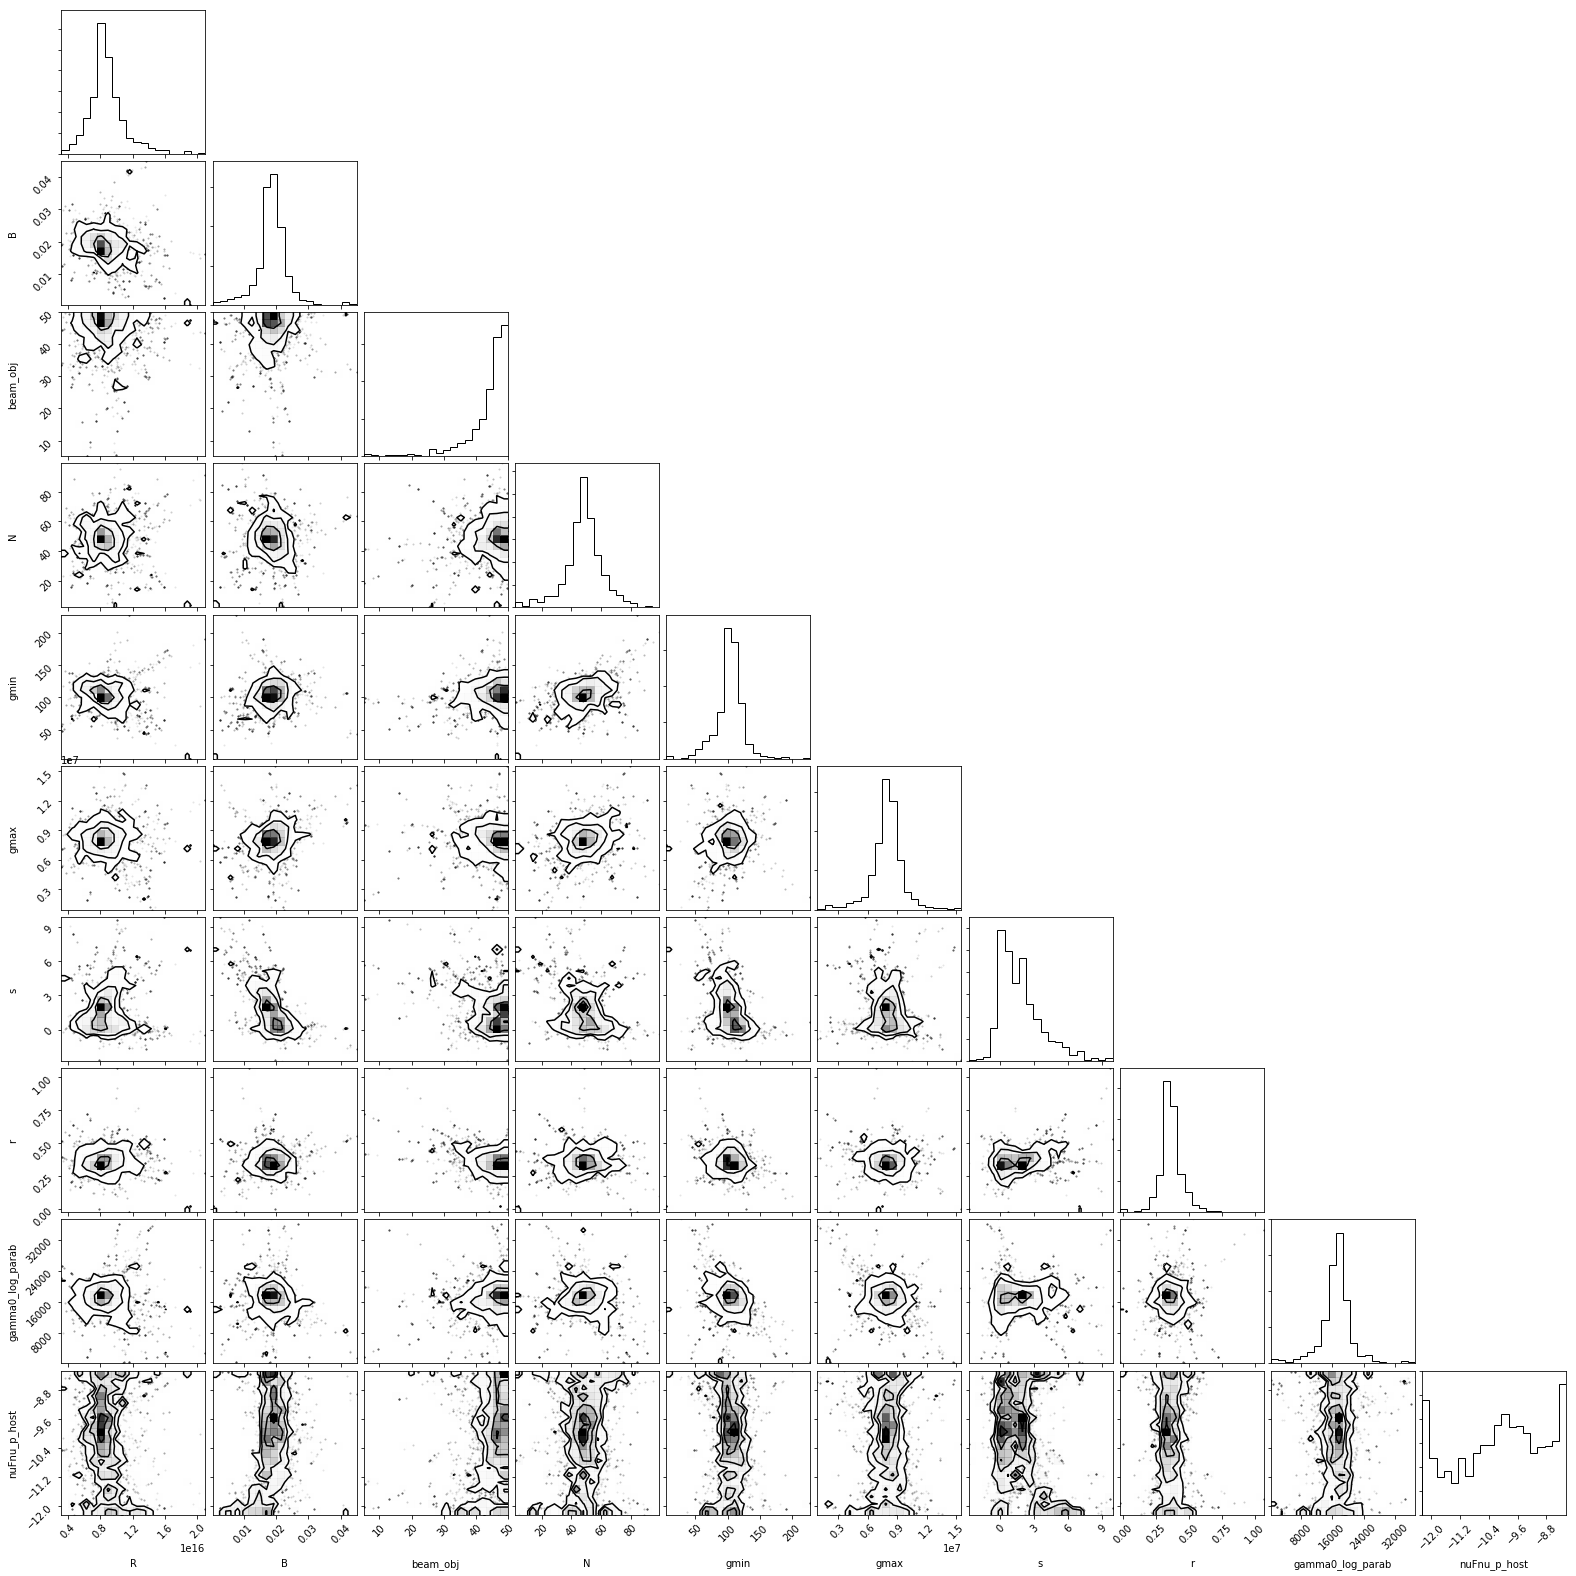

In [73]:
f=mcmc.corner_plot()
